In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from calendar import monthrange

%matplotlib inline

## Задача: Проанализировать совершенные покупки и ответить на вопросы продакт-менеджера:
### 1. Сколько у нас пользователей, которые совершили покупку только один раз? 

### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

### 3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
### 5.  В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

### 6. Построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

In [2]:
df1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-radchenko-26/project_database/olist_customers_dataset.csv')
df2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-radchenko-26/project_database/olist_orders_dataset.csv', parse_dates=['order_delivered_carrier_date', 'order_delivered_customer_date', 'order_approved_at'])
df3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-radchenko-26/project_database/olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

In [3]:
df = df1.merge(df2, on = 'customer_id').fillna(0)

In [5]:
df1.customer_unique_id.value_counts().sort_values().head()

5413ac632f2eb867ef5b32c1fbf8c6e5    1
43481ffd364a0e241d692a08c405f282    1
b067f83c11f3d3deda01a9e220ac0aa2    1
958c4904e0520fb16a25fdf2e059421e    1
642308724fc6fb30a70a29dfc6156281    1
Name: customer_unique_id, dtype: int64

In [6]:
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [8]:
df.dtypes

customer_id                      object
customer_unique_id               object
customer_zip_code_prefix          int64
customer_city                    object
customer_state                   object
order_id                         object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [9]:
df.shape

(99441, 12)

In [10]:
df.order_approved_at.isna().sum()

0

In [9]:
df.query('order_status == "canceled"').head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,0,0,2018-04-09 00:00:00
378,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,0,0,2018-03-06 00:00:00
380,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,0,0,2017-06-30 00:00:00
409,ffaded93e5a1fce06363cfb6905676a1,587b326ba3bf8aa4d3e50fb1f38ea79f,6722,cotia,SP,5bca61e411c4fcce08327a8efc371911,canceled,2018-06-13 20:52:10,2018-06-13 21:20:38,0,0,2018-07-11 00:00:00
878,c8223f76047e09bea798462f2f46ffa9,b4ee22e08cdaeab0b8e6bf2e67d7c19b,45690,una,BA,5b4858f2dcf69731f2285a38829bfa7c,canceled,2018-02-15 20:53:17,2018-02-15 21:06:43,2018-02-16 16:52:52,0,2018-03-16 00:00:00


In [10]:
df.query('order_approved_at == 0 and order_status != "canceled"').head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
8970,0bf35cac6cc7327065da879e2d90fae8,c4c0011e639bdbcf26059ddc38bd3c18,13225,varzea paulista,SP,d77031d6a3c8a52f019764e68f211c69,delivered,2017-02-18 11:04:19,0,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
13047,4ee64f4bfc542546f422da0aeb462853,10d5890ed5e7ec78a7db23b5ac579b17,93025,sao leopoldo,RS,35de4050331c6c644cddc86f4f2d0d64,created,2017-12-05 01:07:58,0,0,0,2018-01-08 00:00:00
13890,1e101e0daffaddce8159d25a8e53f2b2,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ,12a95a3c06dbaec84bcfb0e2da5d228a,delivered,2017-02-17 13:05:55,0,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
20863,d5de688c321096d15508faae67a27051,d49f3dae6bad25d05160fc17aca5942d,36400,conselheiro lafaiete,MG,7002a78c79c519ac54022d4f8a65e6e8,delivered,2017-01-19 22:26:59,0,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
22703,07a2a7e0f63fd8cb757ed77d4245623c,79af1bbf230a2630487975aa5d7d6220,37660,paraisopolis,MG,51eb2eebd5d76a24625b31c33dd41449,delivered,2017-02-18 15:52:27,0,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29 00:00:00


In [17]:
df.query('order_approved_at != 0 and order_status != "canceled" and order_status != "unavailable"') \
    .customer_unique_id.value_counts().to_frame().query('customer_unique_id == 1')

,customer_unique_id
73f114d20e161efe2a16cea9855bd2be,1
a667c69a33cd6139f833eb4d80904f7b,1
39370dae1e24d5b30613cab35e7cf58c,1
017c7f75ca30943882f48d5fda81e2df,1
d8d0db2e59c48dec4d157a06ebba01ef,1
...,...
a834553432bd8ff257680a9e8b8b06cc,1
ae0e4a6b52bcaa15eb032578f6936c23,1
924108dbd47c4403acf5fb188253cb7f,1
ec3f200f1ecb2a979fcdf36e5882b917,1


## Задание 1
92087 пользователей, которые совершили покупку только один раз. Покупкой считаем неотмененные, доступные, оплаченные заказы.

In [15]:
df.query('order_approved_at != 0 and order_status != "canceled" and order_status != "unavailable"') \
    .customer_unique_id.value_counts().to_frame().query('customer_unique_id == 1').count()

customer_unique_id    92087
dtype: int64

### Начало задания №2:

#### Отмена по причине неоплаты

In [28]:
df.query('order_status == "canceled" and order_approved_at == 0').shape[0]

141

#### Отмена по причине потери на этапе передачи заказа партнеру по логистике

In [29]:
df.query('order_status == "canceled" and order_approved_at != 0 and order_delivered_carrier_date == 0').shape[0]

409

#### Доставленные, но отмененные заказы

In [25]:
df.query('order_status == "canceled" and order_delivered_customer_date != 0').shape[0]

6

#### У одного order_id одинаковое shipping_limit_date

In [19]:
df3.query('order_id == "428a2f660dc84138d969ccd69a0ab6d5"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
29257,428a2f660dc84138d969ccd69a0ab6d5,1,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29258,428a2f660dc84138d969ccd69a0ab6d5,2,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29259,428a2f660dc84138d969ccd69a0ab6d5,3,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29260,428a2f660dc84138d969ccd69a0ab6d5,4,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29261,428a2f660dc84138d969ccd69a0ab6d5,5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29262,428a2f660dc84138d969ccd69a0ab6d5,6,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29263,428a2f660dc84138d969ccd69a0ab6d5,7,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29264,428a2f660dc84138d969ccd69a0ab6d5,8,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29265,428a2f660dc84138d969ccd69a0ab6d5,9,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
29266,428a2f660dc84138d969ccd69a0ab6d5,10,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22


In [33]:
df3_order = df3.groupby('order_id', as_index = False) \
    .agg({'shipping_limit_date': 'first'})

In [34]:
df3_order.head()

,order_id,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-19 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,2017-05-03 11:05:13
2,000229ec398224ef6ca0657da4fc703e,2018-01-18 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,2018-08-15 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-13 13:57:51


In [35]:
df_ad = df.merge(df3_order, how = 'left', on = 'order_id').fillna(0)

#### Проработали 0 значение в столбце shipping_limit_date

In [36]:
df_ad.query('shipping_limit_date == 0 and order_status == "canceled" and order_delivered_carrier_date != 0')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date


In [37]:
df_ad.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-22 15:22:12
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-18 20:58:32
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-06-05 16:19:10
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-27 16:31:16
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07-31 10:10:09


#### Потеря на этапе доставки

In [41]:
df_delivery = df_ad.query('order_status == "canceled" and order_delivered_carrier_date != 0 and order_delivered_customer_date == 0')

In [42]:
df_delivery

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
878,c8223f76047e09bea798462f2f46ffa9,b4ee22e08cdaeab0b8e6bf2e67d7c19b,45690,una,BA,5b4858f2dcf69731f2285a38829bfa7c,canceled,2018-02-15 20:53:17,2018-02-15 21:06:43,2018-02-16 16:52:52,0,2018-03-16 00:00:00,2018-02-21 20:06:43
1922,3885c59916b2b261205c303fe0a10abf,f72d1ee92d55688d07ca88506300715e,22790,rio de janeiro,RJ,885935156ba43094f3ae95f3c14e0381,canceled,2018-02-02 16:06:44,2018-02-06 04:32:39,2018-02-07 20:48:31,0,2018-03-08 00:00:00,2018-02-20 02:55:37
2910,b16ed08790d757ebcbc3533101fb1ace,ea8a37a119980ee4681e28145b39bb3b,6160,osasco,SP,9c83e5ae8ff2b5cad999c3dc6129a888,canceled,2018-03-03 09:44:30,2018-03-03 10:20:20,2018-03-05 19:19:03,0,2018-03-15 00:00:00,2018-03-08 10:20:20
3601,6ef5c9f7a060756a678e74a07a3bdfd5,b46143871bd7f63bcbd5acd898b5e1ee,66055,belem,PA,9f0e70e8d046d9e0626bbdaf1aff88c4,canceled,2018-01-24 12:12:58,2018-01-24 15:16:07,2018-01-25 20:53:51,0,2018-03-06 00:00:00,2018-01-30 15:16:07
3842,4a6f6cd7b3fa8d3f9a370adfdad0fa97,71ba8ba1fca338623659e60a7a364d0e,24800,itaborai,RJ,bef875448d5a4f703555d2dd5f8382b5,canceled,2018-01-23 09:48:56,2018-01-23 10:20:10,2018-01-24 21:04:56,0,2018-02-22 00:00:00,2018-01-29 10:20:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88562,6903c9e22ca171ab56f877af3ebaa9dd,6e591d9acd20df3d180db1b57c621e96,64009,teresina,PI,66dbde751178d7674bd09f18b6d25006,canceled,2018-02-05 16:30:33,2018-02-05 16:52:11,2018-02-07 22:52:43,0,2018-03-12 00:00:00,2018-02-14 16:52:11
90897,19a045432879d6ddb4fd5611a0e2ba5b,6472bdcbf7c12cef720eb284dbb68048,21321,rio de janeiro,RJ,5abf37ab57e23f69a9c8ab98c4800273,canceled,2018-01-28 00:25:15,2018-01-28 00:36:35,2018-02-01 20:07:57,0,2018-02-20 00:00:00,2018-02-01 00:36:35
91038,f89df6ef365783b667b626aeaffc5e2d,20b3cac71a94917246f3ec368d36776f,9550,sao caetano do sul,SP,ab76f54a321a0431ef243b3b6865078b,canceled,2018-02-04 12:25:42,2018-02-04 12:51:26,2018-02-06 23:21:57,0,2018-02-21 00:00:00,2018-02-08 12:51:26
96255,078c6672babf4cf39a551e2dcd79229e,5d13c5bdde211e7b29f55af368b42a53,5887,sao paulo,SP,f3c5d914eec90079a826c2b5ea7fe6bc,canceled,2018-01-26 12:58:01,2018-01-26 13:12:44,2018-01-26 21:45:07,0,2018-02-19 00:00:00,2018-02-01 13:12:44


In [44]:
pd.options.mode.chained_assignment = None

df_delivery['delta'] = df_delivery.shipping_limit_date - df_delivery.order_delivered_carrier_date

#### Просроченная дата доставки продавцом для передачи заказа партнеру по логистике

In [46]:
df_delivery.query('delta < "0"').sort_values('delta')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,delta
6596,9cce7727e7d1d1a738ccc755eae38e93,78f244c2ca9bc50af8437bb3e3e40679,21330,rio de janeiro,RJ,47e96b5cb6f0592d336b6bf8a817d1c3,canceled,2018-01-21 12:44:16,2018-01-22 13:49:10,2018-02-01 00:08:56,0,2018-02-19 00:00:00,2018-01-26 13:49:10,-6 days +13:40:14
4321,4afea82f984caa99c5946b758f101abd,f04fb267036654af73a83e7c4d3414ce,77814,araguaina,TO,2c0032906c603dcc21cd954828fa77d0,canceled,2018-02-06 13:44:50,2018-02-06 15:55:40,2018-02-16 20:35:24,0,2018-03-12 00:00:00,2018-02-12 15:55:40,-5 days +19:20:16
69135,b35c38c2cd6a72b58cb104154d9782e4,1b147d0d5982b646a839c1952eb1f518,24110,niteroi,RJ,1def7af24cb7182497acfd953f6dd88b,canceled,2017-12-21 09:22:36,2017-12-23 02:12:37,2018-01-30 19:28:55,0,2018-02-20 00:00:00,2018-01-29 02:12:37,-2 days +06:43:42
66774,952f534f87d6ec6eeaa2cfd1d5987362,0ddfa54803cfa2cbdfff70b8620151a4,18570,conchas,SP,9ec3685b1f21c7dfff4f656392b186dd,canceled,2018-02-20 11:37:45,2018-02-20 11:50:31,2018-02-27 16:17:59,0,2018-03-12 00:00:00,2018-02-26 11:50:31,-2 days +19:32:32
90897,19a045432879d6ddb4fd5611a0e2ba5b,6472bdcbf7c12cef720eb284dbb68048,21321,rio de janeiro,RJ,5abf37ab57e23f69a9c8ab98c4800273,canceled,2018-01-28 00:25:15,2018-01-28 00:36:35,2018-02-01 20:07:57,0,2018-02-20 00:00:00,2018-02-01 00:36:35,-1 days +04:28:38
57766,5775437e881f0a230649f5c63e1f9241,1dcc7becfd4d62e031998c70eb24bae0,5159,sao paulo,SP,4472eca3b65b1dca5e0d59c0e4e0c6bc,canceled,2018-02-10 07:39:19,2018-02-10 08:20:22,2018-02-15 22:22:46,0,2018-02-26 00:00:00,2018-02-15 08:20:22,-1 days +09:57:36
46373,58512a1043fd8047a4f96d5fa665fd2d,daba2e7a00c149161c68cbb18db656a9,28800,rio bonito,RJ,854f8cb8dacdc3abc4cce7a7df6fcc1f,canceled,2018-02-02 09:09:27,2018-02-02 09:15:27,2018-02-08 22:06:59,0,2018-03-06 00:00:00,2018-02-08 09:15:27,-1 days +11:08:28
36992,fa9db18cb6fd65d306a4d710799111a8,786abe8655280c105e08af1030cd3738,9941,diadema,SP,fe9fae71b4fa7d05f1934adc54391f8d,canceled,2018-02-15 15:28:12,2018-02-15 15:46:54,2018-02-21 19:59:14,0,2018-03-07 00:00:00,2018-02-21 14:46:54,-1 days +18:47:40


#### Потеря на этапе доставки

In [54]:
df_delivery.query('delta > "0"').sort_values('delta').shape[0]

61

#### недоставлены по причине недоступности

In [53]:
df.query('order_status == "unavailable"').shape[0]

609

In [31]:
df2.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date            object
dtype: object

#### Данные с 2016-09-04 по 2018-10-17 те примерно 26.5 месяцев

In [55]:
df2.sort_values('order_purchase_timestamp').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20 00:00:00
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28 00:00:00
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30 00:00:00
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25 00:00:00


### Проверка, всего отмененных заказов 625, из них:
#### отменены после получения заказа - 6, 
#### Неоплаченные - 141
#### Потеря на этапе передачи заказа партнеру по логистике - 409  
#### Просроченная дата доставки продавцом для передачи заказа партнеру по логистике - 8
#### Потеря на этапе доставки - 61

In [56]:
df.query('order_status == "canceled"')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,0,0,2018-04-09 00:00:00
378,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,0,0,2018-03-06 00:00:00
380,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,0,0,2017-06-30 00:00:00
409,ffaded93e5a1fce06363cfb6905676a1,587b326ba3bf8aa4d3e50fb1f38ea79f,6722,cotia,SP,5bca61e411c4fcce08327a8efc371911,canceled,2018-06-13 20:52:10,2018-06-13 21:20:38,0,0,2018-07-11 00:00:00
878,c8223f76047e09bea798462f2f46ffa9,b4ee22e08cdaeab0b8e6bf2e67d7c19b,45690,una,BA,5b4858f2dcf69731f2285a38829bfa7c,canceled,2018-02-15 20:53:17,2018-02-15 21:06:43,2018-02-16 16:52:52,0,2018-03-16 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
98551,75c6e03e7206bd1dd59f427c9f75142a,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP,81b7c7bbc8ec003eeb67d87441a6a148,canceled,2018-08-20 09:03:23,0,0,0,2018-09-03 00:00:00
98746,ef775ae2f3b831b79dd2e9bcf77bfb06,46c0a00dac020d24bfdfbc8b214d54de,27150,barra do pirai,RJ,1cd8d1567debd198821fe9d46d99b5b1,canceled,2017-09-25 20:16:38,2017-09-25 20:28:20,0,0,2017-10-20 00:00:00
98786,d9335c099e6943d88ac5f8a7cb418b66,22af178809fa6887af2cc4f7d7bdc0bc,1218,sao paulo,SP,808c7c69c2778bdf4689eee0286e2bef,canceled,2018-02-22 07:57:07,2018-02-22 08:10:27,0,0,2018-03-13 00:00:00
99007,2034cc6d6d517007a9ba3e22ba643344,cb47d51801e7379766c5cd8ff623f37f,13052,campinas,SP,27d6012b882832dc9ddcf34304eeb77c,canceled,2017-11-11 10:44:49,2017-11-11 10:55:28,0,0,2017-11-27 00:00:00


In [57]:
data = {'Causes_of_not_delivery':['non_payment', 'order_transfer_failed', 'order_transfer_late', 'delivery_lost', 'unavailable'], 'Quantity':[141, 409, 8, 61, 609]}
df_pie = pd.DataFrame(data)
df_pie_by_month = pd.DataFrame(data)
df_pie_by_month['Quantity'] = (df_pie_by_month.Quantity / 26.5).round(0)

In [58]:
df_pie_by_month.Quantity.sum()

45.0

Среднее количество отмененных заказов за месяц

In [59]:
df_pie_by_month

,Causes_of_not_delivery,Quantity
0,non_payment,5.0
1,order_transfer_failed,15.0
2,order_transfer_late,0.0
3,delivery_lost,2.0
4,unavailable,23.0


## Задание 2
#### Детализация:
1. non_payment - Неоплаченные заказы
2. order_transfer_failed - Потеря на этапе передачи заказа партнеру по логистике 
3. order_transfer_late - Просроченная дата доставки продавцом для передачи заказа партнеру по логистике 
4. delivery_lost - Потеря на этапе доставки 
5. unavailable - статус: недоступен

([<matplotlib.patches.Wedge at 0x7fe0d76369e8>,
 [Text(1.029207112062336, 0.3882431203257903, 'non_payment'),
  Text(-0.2152893636395144, 1.0787263276214654, 'order_transfer_failed'),
  Text(-1.048570253134725, 0.33241604088999477, 'order_transfer_late'),
  Text(-1.0906504802317096, 0.14311369595654225, 'delivery_lost'),
  Text(0.014070396267974912, -1.0999100072046177, 'unavailable')],
 [Text(0.5613856974885469, 0.21176897472315834, '11.48%'),
  Text(-0.11743056198518965, 0.5883961787026174, '33.31%'),
  Text(-0.5719474108007591, 0.18131784048545166, '0.65%'),
  Text(-0.5949002619445688, 0.07806201597629576, '4.97%'),
  Text(0.007674761600713588, -0.5999509130207006, '49.59%')])

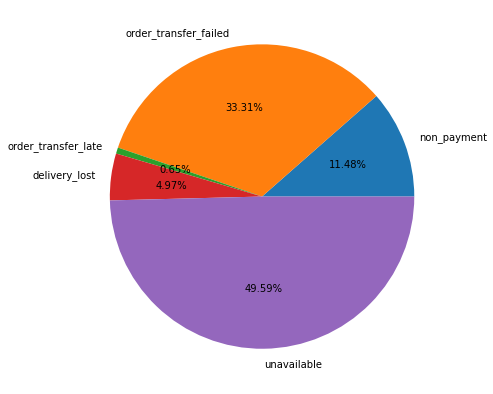

In [41]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df_pie.Quantity, labels = df_pie.Causes_of_not_delivery, autopct='%1.2f%%')

### Начало задания №3:

In [60]:
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [61]:
df2['weekday'] = df2.order_approved_at.dt.day_name()
df2_new = df2.fillna(0).query('order_approved_at != 0 and order_status != "canceled" and order_status != "unavailable"')
df2_new.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,Tuesday


In [62]:
df2_new.shape

(98188, 9)

In [63]:
df3.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [64]:
df_goods = df3.merge(df2_new, on ='order_id')
df_goods = df_goods.groupby('product_id').weekday.agg(pd.Series.mode).reset_index()
df_goods.product_id.nunique()

32726

## Задание 3
 В датафрейме df_goods получили по каждому товару день недели (в колонке weekday), в который данный товар чаще всего покупается.

In [52]:
df_goods

,product_id,weekday
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Friday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32721,fff6177642830a9a94a0f2cba5e476d1,"[Monday, Saturday]"
32722,fff81cc3158d2725c0655ab9ba0f712c,Monday
32723,fff9553ac224cec9d15d49f5a263411f,Saturday
32724,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


### Начало задания №4:

In [65]:
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,Tuesday


In [66]:
df2['year_and_month'] = df2.order_approved_at.dt.to_period("M").astype(str)

In [67]:
df2.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date            object
weekday                                  object
year_and_month                           object
dtype: object

In [72]:
df2['year'] = df2.order_approved_at.dt.year.fillna(0).astype(int)
df2['month'] = df2.order_approved_at.dt.month.fillna(0).astype(int)

In [73]:
df2.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date            object
weekday                                  object
year_and_month                           object
year                                      int64
month                                     int64
dtype: object

In [74]:
df2.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
weekday                           160
year_and_month                      0
year                                0
month                               0
dtype: int64

In [75]:
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday,year_and_month,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,Monday,2017-10,2017,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,Thursday,2018-07,2018,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,Wednesday,2018-08,2018,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,Saturday,2017-11,2017,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,Tuesday,2018-02,2018,2


In [76]:
df2_new = df2.fillna(0).query('order_approved_at != 0 and order_status != "canceled" and order_status != "unavailable"')
df2_new.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday,year_and_month,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,Monday,2017-10,2017,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,Thursday,2018-07,2018,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,Wednesday,2018-08,2018,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,Saturday,2017-11,2017,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,Tuesday,2018-02,2018,2


In [77]:
df2_new['quantity_of_days'] = df2_new.apply(lambda x: monthrange(x.year, x.month)[1], axis = 1)
df2_new.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday,year_and_month,year,month,quantity_of_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,Monday,2017-10,2017,10,31
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,Thursday,2018-07,2018,7,31
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,Wednesday,2018-08,2018,8,31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,Saturday,2017-11,2017,11,30
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,Tuesday,2018-02,2018,2,28


In [66]:
df2_new.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
weekday                          object
year_and_month                   object
year                              int64
month                             int64
quantity_of_days                  int64
dtype: object

In [78]:
df2_new = df2_new.merge(df1, on = 'customer_id', how = 'left')
df2_new.shape

(98188, 17)

In [79]:
df2_new.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday,year_and_month,year,month,quantity_of_days,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,Monday,2017-10,2017,10,31,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,Thursday,2018-07,2018,7,31,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,Wednesday,2018-08,2018,8,31,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,Saturday,2017-11,2017,11,30,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,Tuesday,2018-02,2018,2,28,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [80]:
df_task4 = df2_new.groupby(['year_and_month', 'customer_unique_id', 'quantity_of_days'], as_index = False) \
    .agg({'customer_city': 'count'}) \
    .sort_values('customer_city')

df_task4['average_purchases'] = (df_task4.customer_city / (df_task4.quantity_of_days / 7)).round(0)
df_task4.head()

,year_and_month,customer_unique_id,quantity_of_days,customer_city,average_purchases
0,2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,30,1,0.0
64495,2018-04,00b2ee6366438f46105832fd9acaf56f,30,1,0.0
64494,2018-04,00ab80210f1875276065f3c1911a2110,30,1,0.0
64493,2018-04,009f647a455451d6c325bef96685e1c1,30,1,0.0
64492,2018-04,009dd7b313c04f4ccd9d4e423bc04ba7,30,1,0.0


In [81]:
df_task4.customer_city.sum()

98188

Проверка, суммарное количество заказов совпало с первоначальным количеством, которое у нас было в задании 1 (98188).

Далее допилим датафрейм для более понятного вида и оставим только нужные колонки.

In [82]:
df_task4 = df_task4.reset_index().drop(['quantity_of_days', 'customer_city', 'index'], axis = 1)

## Задание 4
P.S. В датафрейме df_task4 присутствуют только пользователи которые совершили хотя бы одну покупку за весь промежуток времени. 

In [83]:
df_task4

,year_and_month,customer_unique_id,average_purchases
0,2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,0.0
1,2018-04,00b2ee6366438f46105832fd9acaf56f,0.0
2,2018-04,00ab80210f1875276065f3c1911a2110,0.0
3,2018-04,009f647a455451d6c325bef96685e1c1,0.0
4,2018-04,009dd7b313c04f4ccd9d4e423bc04ba7,0.0
...,...,...,...
96841,2017-04,25a560b9a6006157838aab1bdbd68624,1.0
96842,2017-09,b08fab27d47a1eb6deda07bfd965ad43,1.0
96843,2017-02,a239b8e2fbce33780f1f1912e2ee5275,1.0
96844,2018-02,3e43e6105506432c953e165fb2acf44c,1.0


### Начало задания №5:

In [101]:
df_purchases = df.query('order_purchase_timestamp >=  "2017-01-01" and order_purchase_timestamp <  "2018-01-01"')
df_purchases.order_purchase_timestamp.agg(['min', 'max'])

min    2017-01-05 11:56:06
max    2017-12-31 23:29:31
Name: order_purchase_timestamp, dtype: object

In [102]:
df_purchases['order_purchase_timestamp'] = pd.to_datetime(df.order_purchase_timestamp, format = '%Y-%m-%d').astype('datetime64[M]')

#### Нашли дату первой покупки

In [103]:
df_purchases_first = df_purchases.groupby('customer_unique_id').order_purchase_timestamp.min().reset_index() \
    .rename(columns={'order_purchase_timestamp': 'first_purchase'})
df_purchases_first.head()

,customer_unique_id,first_purchase
0,0000f46a3911fa3c0805444483337064,2017-03-01
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
2,0004aac84e0df4da2b147fca70cf8255,2017-11-01
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-01
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-01


In [104]:
month = pd.DataFrame(pd.date_range('2017-01-01', '2017-12-01', freq = 'MS'))
month.shape

(12, 1)

In [105]:
month.columns = ['month']

month

,month
0,2017-01-01
1,2017-02-01
2,2017-03-01
3,2017-04-01
4,2017-05-01
5,2017-06-01
6,2017-07-01
7,2017-08-01
8,2017-09-01
9,2017-10-01


In [106]:
df_purchases_first['key'] = 1
month['key'] = 1

In [107]:
12*43713

524556

In [108]:
df_purchases_first = df_purchases_first.merge(month, on = 'key', how = 'left').drop('key', axis = 1).query('month >= first_purchase')
df_purchases_first.head()

,customer_unique_id,first_purchase,month
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01
3,0000f46a3911fa3c0805444483337064,2017-03-01,2017-04-01
4,0000f46a3911fa3c0805444483337064,2017-03-01,2017-05-01
5,0000f46a3911fa3c0805444483337064,2017-03-01,2017-06-01
6,0000f46a3911fa3c0805444483337064,2017-03-01,2017-07-01


In [109]:
df_purchases = df_purchases[['customer_unique_id', 'order_purchase_timestamp']]
df_purchases['value'] = 1
df_purchases = df_purchases.rename(columns={'order_purchase_timestamp': 'month'})
df_purchases

,customer_unique_id,month,value
0,861eff4711a542e4b93843c6dd7febb0,2017-05-01,1
5,4c93744516667ad3b8f1fb645a3116a4,2017-09-01,1
7,57b2a98a409812fe9618067b6b8ebe4f,2017-11-01,1
10,2a7745e1ed516b289ed9b29c7d0539a5,2017-11-01,1
12,918dc87cd72cd9f6ed4bd442ed785235,2017-09-01,1
...,...,...,...
99430,277490f0d435b602fe4475d4b89e9181,2017-05-01,1
99433,e7f8760e2bbd2f1986bebd99596c088e,2017-03-01,1
99435,4b5820135d360a45552b5163835b1d89,2017-12-01,1
99439,73c2643a0a458b49f58cea58833b192e,2017-11-01,1


In [110]:
df_purchases_first.head()

,customer_unique_id,first_purchase,month
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01
3,0000f46a3911fa3c0805444483337064,2017-03-01,2017-04-01
4,0000f46a3911fa3c0805444483337064,2017-03-01,2017-05-01
5,0000f46a3911fa3c0805444483337064,2017-03-01,2017-06-01
6,0000f46a3911fa3c0805444483337064,2017-03-01,2017-07-01


In [111]:
df_retention = df_purchases_first.merge(df_purchases, on= ['customer_unique_id', 'month'], how = 'left').drop_duplicates().fillna(0)

Пояснение почему сделал drop_duplicates. У нас есть пользователи которые сделали несколько покупок в один месяц, но если мы считаем retention, а именно вернулся пользователь в определенный месяц или нет, то можем смело дропнуть повторяющиеся события.

In [112]:
df_retention.head()

,customer_unique_id,first_purchase,month,value
0,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01,1.0
1,0000f46a3911fa3c0805444483337064,2017-03-01,2017-04-01,0.0
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-05-01,0.0
3,0000f46a3911fa3c0805444483337064,2017-03-01,2017-06-01,0.0
4,0000f46a3911fa3c0805444483337064,2017-03-01,2017-07-01,0.0


In [113]:
df_purchases.customer_unique_id.nunique()

43713

In [114]:
df_purchases_first.query('first_purchase == month').groupby('first_purchase').count()

,customer_unique_id,month
first_purchase,,
2017-01-01,765,765
2017-02-01,1752,1752
2017-03-01,2636,2636
2017-04-01,2353,2353
2017-05-01,3596,3596
2017-06-01,3139,3139
2017-07-01,3895,3895
2017-08-01,4184,4184
2017-09-01,4131,4131


In [115]:
df_purchases.groupby(['month', 'customer_unique_id'], as_index = False).sum('value').sort_values('value')

,month,customer_unique_id,value
0,2017-01-01,00115fc7123b5310cf6d3a3aa932699e,1
29454,2017-10-01,985289b5cb474a6e97bfe8c85f0aee74,1
29455,2017-10-01,98604f5822a62e29afd0aab27caba202,1
29456,2017-10-01,986bad28ecce08f4d9bd02d7d1508be6,1
29457,2017-10-01,986d0721d7862ed532a09b74d6fa1dc2,1
...,...,...,...
1850,2017-02-01,a239b8e2fbce33780f1f1912e2ee5275,4
398,2017-01-01,83e7958a94bd7f74a9414d8782f87628,4
25440,2017-09-01,b08fab27d47a1eb6deda07bfd965ad43,4
5521,2017-04-01,25a560b9a6006157838aab1bdbd68624,4


In [116]:
df_retention['lifetime'] = ((df_retention.month - df_retention.first_purchase)/np.timedelta64(1, 'M')).round().astype(int)
df_retention['first_purchase'] = df_retention.first_purchase.astype(str)
df_retention = df_retention.query('lifetime >=1')
ax = df_retention.pivot_table(index = 'first_purchase', columns = 'lifetime', values='value', aggfunc = 'mean')

ax

lifetime,1,2,3,4,5,6,7,8,9,10,11
first_purchase,,,,,,,,,,,
2017-01-01,0.003922,0.002614,0.001307,0.003922,0.001307,0.005229,0.001307,0.001307,0.000000,0.003922,0.001307
2017-02-01,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,NaN
2017-03-01,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,NaN,NaN
2017-04-01,0.005950,0.002125,0.001700,0.003400,0.002550,0.003400,0.002975,0.002975,NaN,NaN,NaN
2017-05-01,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,NaN,NaN,NaN,NaN
2017-06-01,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,NaN,NaN,NaN,NaN,NaN
2017-07-01,0.005135,0.003594,0.002567,0.002824,0.002054,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,0.006931,0.003346,0.002629,0.003585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,0.006778,0.005326,0.002905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание 5

Самый высокий retention на 3й месяц равен 0.41 %. Когорта: 2017-06-01. Те, пользователи, которые сделали свой первый заказ в июне.

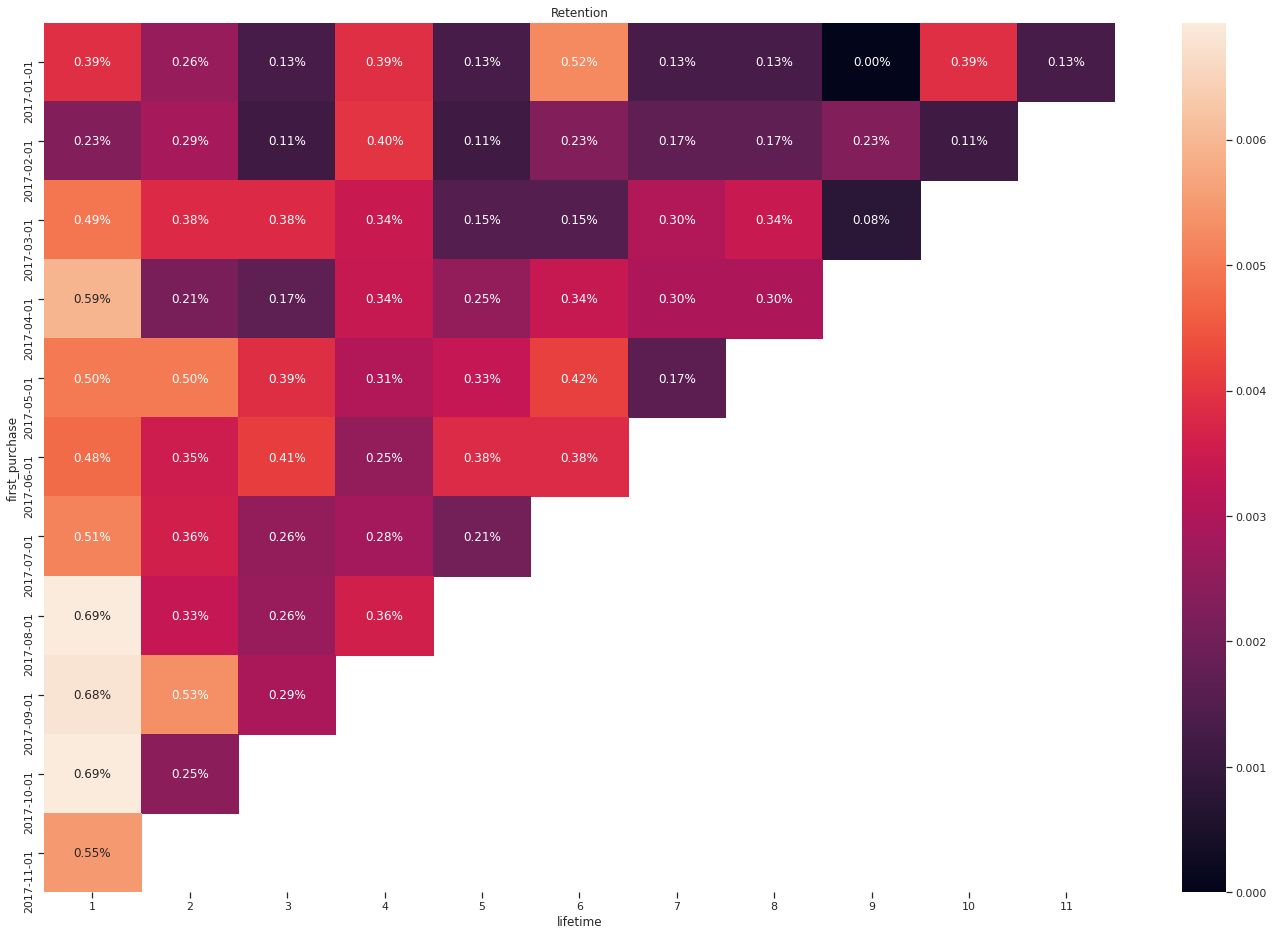

In [117]:
sns.set(style="ticks")
plt.figure(figsize=(24, 16))
plt.title("Retention")
sns.heatmap(ax, mask=ax.isnull(), annot=True, fmt=".2%");

### Начало задания №6:

In [119]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [121]:
df['order_purchase_timestamp'] = pd.to_datetime(df.order_purchase_timestamp, format = '%Y-%m-%d')
df.order_purchase_timestamp.agg(['max', 'min'])

max   2018-10-17 17:30:18
min   2016-09-04 21:15:19
Name: order_purchase_timestamp, dtype: datetime64[ns]

#### Взяли пользователей, которые совершили покупки. Рассматривать будем 2017 год и составлять RFM на 2018-01-01

In [122]:
df_base = df.query('order_purchase_timestamp >=  "2017-01-01" and order_purchase_timestamp < "2018-01-01" and order_approved_at != 0 and order_status != "canceled" and order_status != "unavailable"')
df_base.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04 00:00:00
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20 00:00:00
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,18682,lencois paulista,SP,83d8f70418eefd96f37b483dff430305,delivered,2017-09-09 09:54:57,2017-09-09 10:10:17,2017-09-12 12:42:43,2017-09-20 20:23:34,2017-10-02 00:00:00


In [123]:
df_base.order_purchase_timestamp.agg(['max', 'min'])

max   2017-12-31 23:29:31
min   2017-01-05 11:56:06
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [124]:
df_base.customer_unique_id.nunique()

43017

In [125]:
df_base_r = df_base.groupby('customer_unique_id', as_index = False).agg({'order_purchase_timestamp': 'max'})
df_base_r['year'] = pd.to_datetime('2018-01-01')
df_base_r['recency'] = (df_base_r.year - df_base_r.order_purchase_timestamp).dt.days

#### При сборе отобрать только customer_unique_id and recency

In [127]:
df_base_r.head()

,customer_unique_id,order_purchase_timestamp,year,recency
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2018-01-01,296
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2018-01-01,80
2,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2018-01-01,47
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2018-01-01,302
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10,2018-01-01,166


In [129]:
df_base_f = df_base.groupby('customer_unique_id').customer_city.count().reset_index() \
    .rename(columns={'customer_city': 'frequency'}) \
    .sort_values('frequency')

df_base_f

,customer_unique_id,frequency
0,0000f46a3911fa3c0805444483337064,1
28469,a963d9fa0caa15d435d12b3ae907b1de,1
28470,a964e7b58956493aae6d527b20a64e87,1
28471,a96551138acc1e993439cf882f306839,1
28472,a967a2aed325ac121484ed757da16f58,1
...,...,...
4627,1b6c7548a2a1f9037c1fd3ddfed95f33,5
12105,47c1a3033b8b77b3ab6e109eb4d5fdf3,5
37139,dc813062e0fc23409cd255f7f53c7074,5
3232,12f5d6e1cbf93dafd9dcc19095df0b3d,6


In [130]:
df_base.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04 00:00:00
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20 00:00:00
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,18682,lencois paulista,SP,83d8f70418eefd96f37b483dff430305,delivered,2017-09-09 09:54:57,2017-09-09 10:10:17,2017-09-12 12:42:43,2017-09-20 20:23:34,2017-10-02 00:00:00


In [131]:
df3.price

0          58.90
1         239.90
2         199.00
3          12.99
4         199.90
           ...  
112645    299.99
112646    350.00
112647     99.90
112648     55.99
112649     43.00
Name: price, Length: 112650, dtype: float64

In [132]:
df3_merge = df3.groupby('order_id').price.sum().reset_index().sort_values('price')
df3_merge.head()

,order_id,price
42562,6e864b3f0ec71031117ad4cf46b7f2a1,0.85
24174,3ee6513ae7ea23bdfab5b9ab60bffcb5,0.85
93208,f1d5c2e6867fa93ceee9ef9b34a53cbf,2.20
89758,e8bbc1d69fee39eee4c72cb5c969e39d,2.29
21805,38bcb524e1c38c2c1b60600a80fc8999,2.90


In [133]:
df_base_m = df_base.merge(df3_merge, on = 'order_id', how = 'left')
df_base_m = df_base_m.groupby('customer_unique_id').price.sum().reset_index().rename(columns={'price': 'monetary'})
df_base_m.sort_values('monetary')

,customer_unique_id,monetary
31771,bd06ce0e06ad77a7f681f1a4960a3cc6,2.29
18740,6f5b9d1cdccc4d28f0483a612edecacf,3.85
6801,2878e5b88167faab17d4fb83a986d38b,3.85
10856,4079d39cb3fdea47201540107c1673dc,3.90
7370,2bca5fe01d46ab5cc2bc5aaade88d850,3.90
...,...,...
10781,4007669dec559734d6f53e029e360987,5934.60
42879,ff4159b92c40ebe40454e3e6a7c35ed6,6499.00
37102,dc4802a71eae9be1dd28f5d788ceb526,6735.00
36732,da122df9eeddfedc1dc1f5349a1a690c,7388.00


In [134]:
df_base_rfm = df_base_r.merge(df_base_f, on = 'customer_unique_id').merge(df_base_m, on = 'customer_unique_id')
df_base_rfm['R'] = 4 - (pd.qcut(df_base_rfm.recency, 4, labels = False))
df_base_rfm.groupby('R').recency.agg(['mean', 'count'])

,mean,count
R,,
1,271.691500,10671
2,166.281048,10685
3,84.891264,10806
4,27.378812,10855


In [135]:
df_base_rfm.frequency.value_counts()

1    41798
2     1124
3       76
4       13
5        4
9        1
6        1
Name: frequency, dtype: int64

In [136]:
def get_f(x):
    if x == 1:
        return(1)
    if x == 2:
        return(2)
    if x == 3:
        return(3)
    if x >= 4:
        return(4)

In [137]:
df_base_rfm['F'] = df_base_rfm.frequency.apply(get_f)
df_base_rfm['M'] = pd.qcut(df_base_rfm.monetary, 4, labels = False) + 1
df_base_rfm.groupby('M').monetary.agg(['mean', 'count'])

,mean,count
M,,
1,29.214291,10767
2,65.007989,10831
3,116.400043,10682
4,358.087434,10737


In [138]:
df_base_rfm

,customer_unique_id,order_purchase_timestamp,year,recency,frequency,monetary,R,F,M
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2018-01-01,296,1,69.00,1,1,2
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2018-01-01,80,1,25.99,3,1,1
2,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2018-01-01,47,1,180.00,4,1,4
3,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2018-01-01,302,1,135.00,1,1,3
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10,2018-01-01,166,1,13.90,2,1,1
...,...,...,...,...,...,...,...,...,...
43012,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-27 22:36:41,2018-01-01,4,1,149.00,4,1,3
43013,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2018-01-01,206,1,1570.00,2,1,4
43014,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2018-01-01,21,1,64.89,4,1,2
43015,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2018-01-01,327,1,89.90,1,1,3


In [139]:
df_base_rfm['RFM_Score'] = df_base_rfm.R + df_base_rfm.F + df_base_rfm.M

In [140]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [141]:
df_base_rfm['segment'] = df_base_rfm.apply(rfm_level, axis=1)
df_rfm = df_base_rfm.sort_values('RFM_Score', ascending = False).groupby('segment', as_index = False).agg({'recency': ['mean'], 'frequency': ['mean'], 'monetary': ['mean', 'count']})
df_rfm

segment     recency frequency    monetary       
                             mean      mean        mean  count
0    Can't Loose Them   32.729006  1.200401  333.641261   2989
1           Champions   59.656323  1.056502  245.242298   5575
2               Loyal   91.601153  1.030709  168.878077   7978
3     Needs Attention  215.398909  1.002922   46.216188   5134
4           Potential  138.842445  1.011010  144.824633  10536
5           Promising  173.363831  1.006805   69.331815   7935
6  Require Activation  273.489895  1.000000   28.480422   2870

## Задание 6

Пояснения по выполнению:
1. Оценки R, F и M давались на основе разделения данных на 4 группы равного размера с помощью функции qcut. Оценка F рассчитывалась вручную так как полученные данные невозможно было разделить на 4 равные группы, из-за слишком большого значения "1" - т.е. слишком много пользователей совершили только одну покупку.

#### Критерии оценки F:

1 покупка - оценка 1

2 покупки - оценка 2

3 покупки - оценка 3

4 и более покупок - оценка 4

<br/>

<br/>

2. После получения оценок R, F и M, произвели сегментацию наших клиентов по сумме полученных оценок:

больше 9 баллов - Can't Loose Them

8 баллов - Champions

7 баллов - Loyal

6 баллов - Potential

5 баллов - Promising

4 балла - Needs Attention

меньше 4 баллов - Require Activation

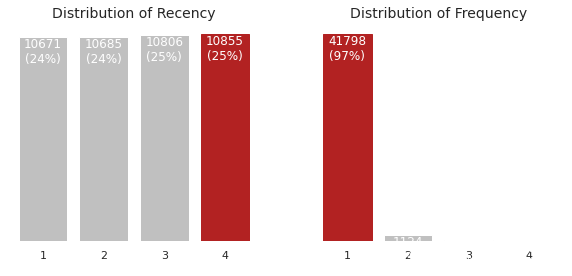

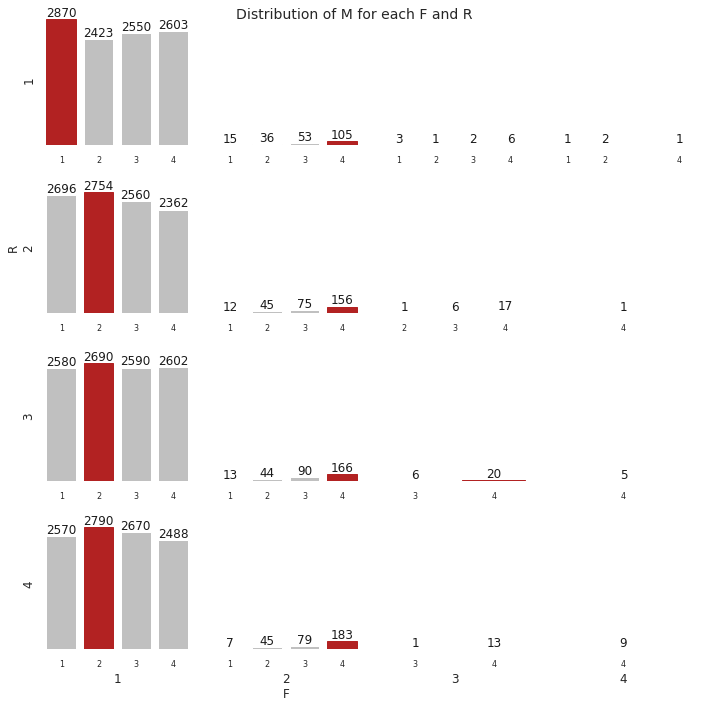

In [153]:
rfm = df_base_rfm
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=4, ncols=4,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 5)
f_range = range(1, 5)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 4:
            if f == 2:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 2:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()